# Modelos para redução de custos de contratação e treinamento de funcionários, baseado na previsão de *turnover* voluntário

O turnover voluntário é uma categoria de rotatividade que acontece em diversas empresas, e acontece quando um empregado decide sair de seu cargo de forma voluntária.

Um dos maiores problemas nas corporações, principalmente de grande porte, é realizar a contratação de pessoas e manter as pessoas talentosas na empresa. Geralmente, o processo de contratação pode levar muito tempo e é gasto muito dinheiro, ou seja, se a empresa possui um funcionário que é considerado um talento é preciso manter esse funcionário na empresa, como, por exemplo; oferecer mais benefícios ou alguma categoria de bonificação, pois caso esse colaborador resolva sair da empresa será gasto muito dinheiro no processo de contratação de um novo colaborador para substituição do que acabou de sair.

Além dos custos do processo de contratação, existe um gasto com o treinamento que já foi dado para esse funcionário que acabou de sair da empresa, possível queda de produtividade da equipe, acúmulo de funções devido à equipe enxuta e outros fatores que tornam todo o processo de contratação/desligamento extremamente custoso.



## Descrição dos dados

Dados de Recursos Humanos de uma Corporação Multinacional 

Base se encontra disponível em: https://www.kaggle.com/kmldas/hr-employee-data-descriptive-analytics

* 14999 Funcionários e 11 Variáveis.
* Variáveis;
  * <em><strong>Emp_Id:</strong></em> Identificação do funcionário.
  * <em><strong>satisfaction_level:</strong></em> Nível de satisfação do funcionário em percentual. 100% ou 1 está muito satisfeito.
  * <em><strong>last_evaluation:</strong></em> Tempo desde a última avaliação.
  * <em><strong>number_project:</strong></em> Número de projetos em que um funcionário está trabalhando.
  * <em><strong>average_montly_hours:</strong></em> Média de horas trabalhadas por funcionário nos últimos 3 meses.
  * <em><strong>time_spend_company:</strong></em> Tempo gasto indo para o escritório.
  * <em><strong>Work_accident:</strong></em> Se o funcionário se envolveu em um acidente de trabalho (0 = Não, 1 = Sim).
  * <em><strong>left:</strong></em> Se o funcionário saiu da empresa (0 = Não, 1 = Sim).
  * <em><strong>promotion_last_5years:</strong></em> Se o empregado foi promovido nos últimos 5 anos (0 = Não, 1 = Sim).
  * <em><strong>Department:</strong></em> Departamento que o funcionário trabalha.
  * <em><strong>salary:</strong></em> Categoria salárial.


## Importação das bibliotecas e bases de dados

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
import tensorflow as tf
import math
import warnings

warnings.filterwarnings('ignore')

mpl.font_manager.fontManager.addfont('/content/sample_data/RobotoSlab-Regular.ttf')
mpl.rc('font', family='Roboto Slab')

In [ ]:
df = pd.read_excel('https://github.com/GeorgeSantos1/Datasets_Kaggle/blob/main/HR_Employee_Data.xlsx?raw=true')

In [ ]:
df.shape

(14999, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp_Id                 14999 non-null  object 
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   left                   14999 non-null  int64  
 8   promotion_last_5years  14999 non-null  int64  
 9   Department             14999 non-null  object 
 10  salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 1.3+ MB


In [ ]:
df.head()

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,IND02438,0.38,0.53,2,157,3,0,1,0,sales,low
1,IND28133,0.80,0.86,5,262,6,0,1,0,sales,medium
2,IND07164,0.11,0.88,7,272,4,0,1,0,sales,medium
3,IND30478,0.72,0.87,5,223,5,0,1,0,sales,low
4,IND24003,0.37,0.52,2,159,3,0,1,0,sales,low




---



## Visualização dos dados

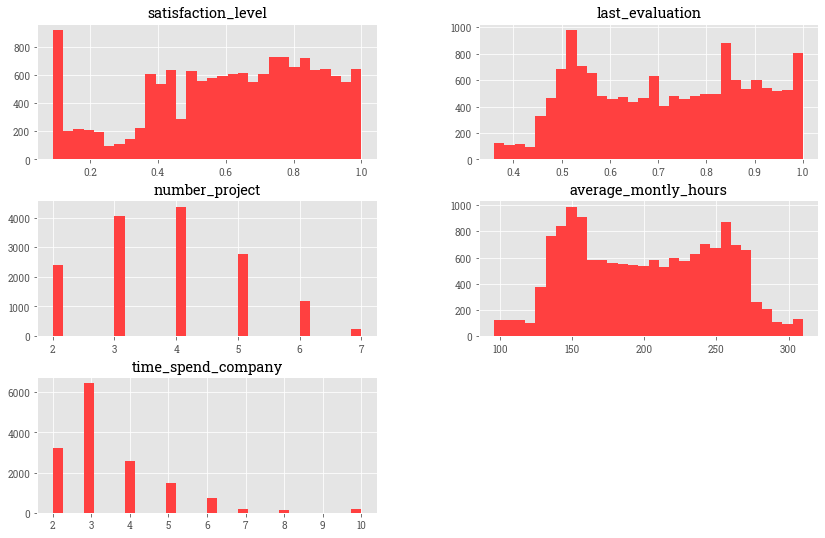

In [ ]:
plt.style.use('ggplot')
df.iloc[:,1:6].hist(bins=30,figsize=(14,9),color='#ff4040',);

Analisando os gráficos pode-se observar que o nível de satisfação apresentado pelos funcionários foi maior que 50%.Também é observável que os funcionários em sua maioria atuam em até 4 projetos, trabalham entre 150 e 250 horas mensais (em média) e gastam menos de 3 unidades de tempo para chegar na companhia.

In [ ]:
# Retirando Variável Identificadora
df.drop(['Emp_Id'],axis=1,inplace=True)

# Dividindo base entre 'left' e 'stayed'
left_df  = df[df['left'] == 1]
stayed_df = df[df['left'] == 0]

# Nº de funcionários em cada base
print('Total de funcionários: ',len(df))
print('Nº de funcionários que sairam da empresa: ',len(left_df) , f'({round(len(left_df)/len(df)*100,2)}%)')
print('Nº de funcionários que ficaram na empresa: ', len(stayed_df), f'({round(len(stayed_df)/len(df)*100,2)}%)')

Total de funcionários:  14999
Nº de funcionários que sairam da empresa:  3571 (23.81%)
Nº de funcionários que ficaram na empresa:  11428 (76.19%)


Possível observar desbalanceamento entre a quantidade de funcionários em cada categoria.

In [ ]:
left_df.describe().round(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,3571.00,3571.00,3571.00,3571.00,3571.00,3571.00,3571.0,3571.00
mean,0.44,0.72,3.86,207.42,3.88,0.05,1.0,0.01
std,0.26,0.20,1.82,61.20,0.98,0.21,0.0,0.07
min,0.09,0.45,2.00,126.00,2.00,0.00,1.0,0.00
25%,0.13,0.52,2.00,146.00,3.00,0.00,1.0,0.00
50%,0.41,0.79,4.00,224.00,4.00,0.00,1.0,0.00
75%,0.73,0.90,6.00,262.00,5.00,0.00,1.0,0.00
max,0.92,1.00,7.00,310.00,6.00,1.00,1.0,1.00


In [ ]:
stayed_df.describe().round(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11428.00,11428.00,11428.00,11428.00,11428.00,11428.00,11428.0,11428.00
mean,0.67,0.72,3.79,199.06,3.38,0.18,0.0,0.03
std,0.22,0.16,0.98,45.68,1.56,0.38,0.0,0.16
min,0.12,0.36,2.00,96.00,2.00,0.00,0.0,0.00
25%,0.54,0.58,3.00,162.00,2.00,0.00,0.0,0.00
50%,0.69,0.71,4.00,198.00,3.00,0.00,0.0,0.00
75%,0.84,0.85,4.00,238.00,4.00,0.00,0.0,0.00
max,1.00,1.00,6.00,287.00,10.00,1.00,0.0,1.00


Com base nas informações descritivas das bases há indícios que funcionários quemficam estão mais satisfeitos em comparação com os funcionários que saem.Também existem evidências de menor carga horária mensal e menor tempo de locomoção em favor dos empregados que ficam na empresa.

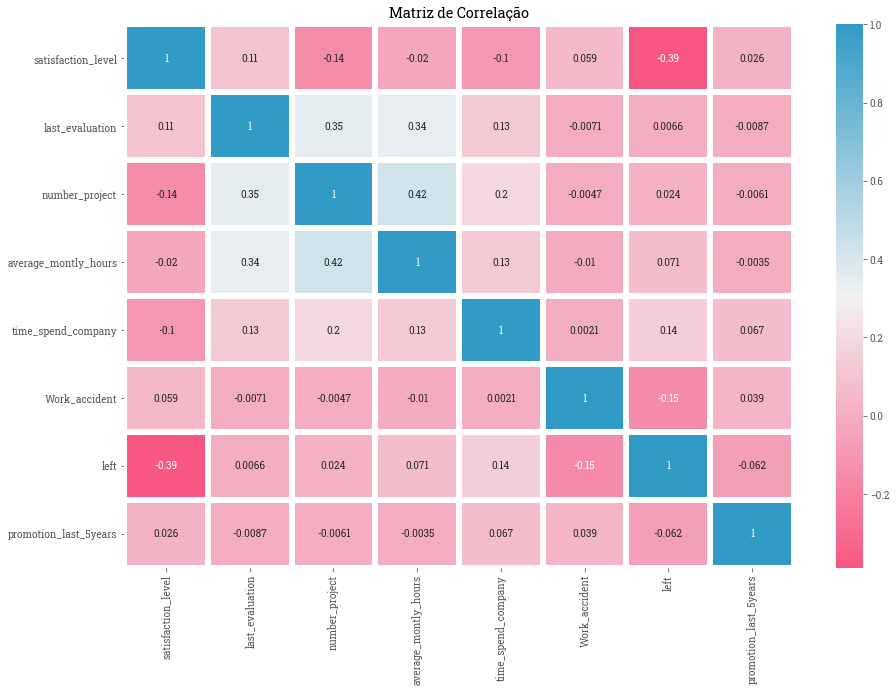

In [ ]:
correlations = df.corr()
f, ax = plt.subplots(figsize = (15,10))
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
sns.heatmap(correlations,annot=True,linewidths=5, cmap=cmap)
ax.set(title='Matriz de Correlação');

Conforme a matriz de correlação:

*   Maior nível de satisfação implica em menor interesse em deixar a empresa.
*   Indícios de que maior tempo de deslocamento esteja associado com maior desejo de saída.
*   Número de projetos e horas trabalhadas estão associados positivamente.





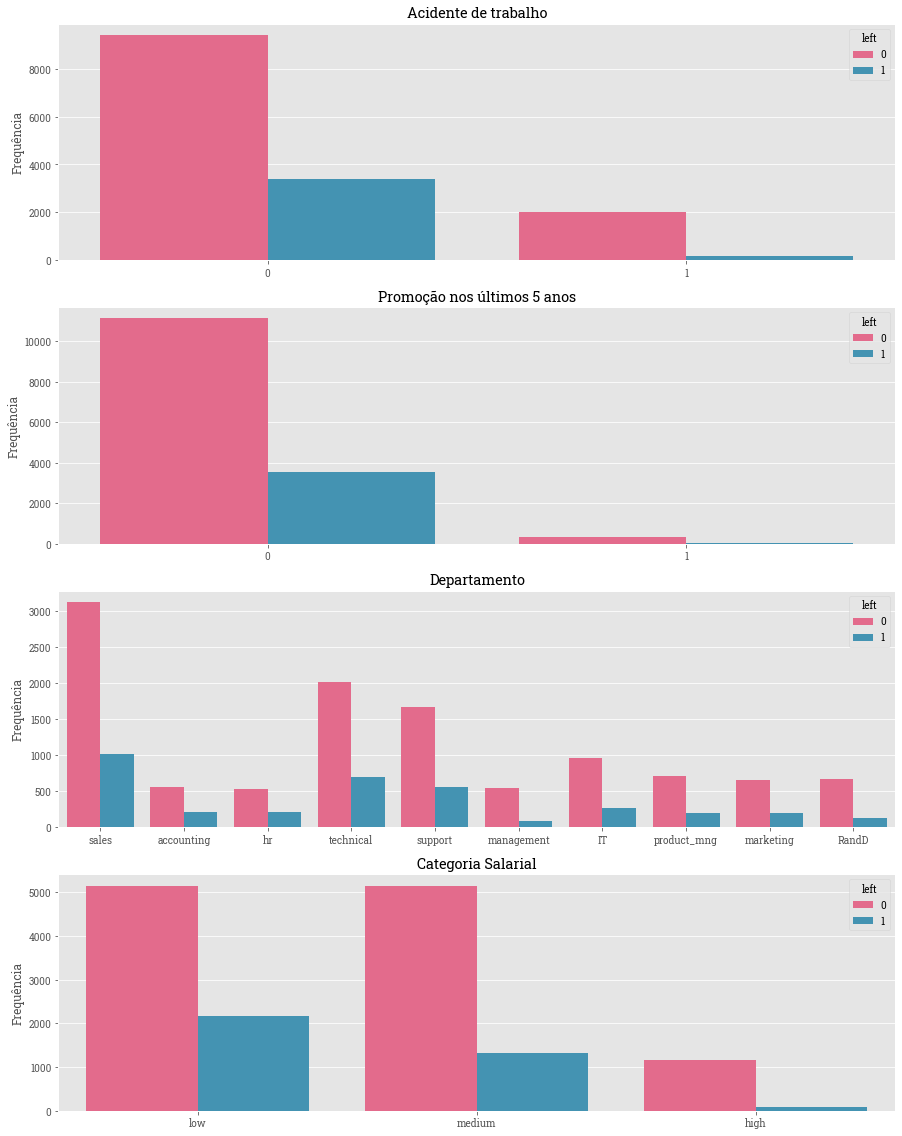

In [ ]:
# Geração da Paleta de cores
graf_color = sns.diverging_palette(0, 230, 90, 60,n=2)

# Geração do gráfico
plt.figure(figsize=[15,20])
plt.subplot(411)
sns.countplot(x='Work_accident',hue='left',data = df,palette=graf_color)
plt.title("Acidente de trabalho"), plt.xlabel(''), plt.ylabel('Frequência')
plt.subplot(412)
sns.countplot(x='promotion_last_5years',hue='left',data = df,palette=graf_color)
plt.title('Promoção nos últimos 5 anos'), plt.xlabel(''),plt.ylabel('Frequência')
plt.subplot(413)
sns.countplot(x='Department',hue='left',data = df,palette=graf_color)
plt.title('Departamento'), plt.xlabel(''), plt.ylabel('Frequência')
plt.subplot(414)
sns.countplot(x='salary',hue='left', data = df,palette=graf_color)
plt.title('Categoria Salarial'), plt.xlabel(''), plt.ylabel('Frequência');

Considerando o gráfico acima é possível concluir que os departamentos de venda, técnico e suporte apresentam maiores quantidades de funcionários que mudaram de emprego. Também pode-se observar que os funcionários que deixaram a empresa recebem salários que são considerados baixos/razoáveis.

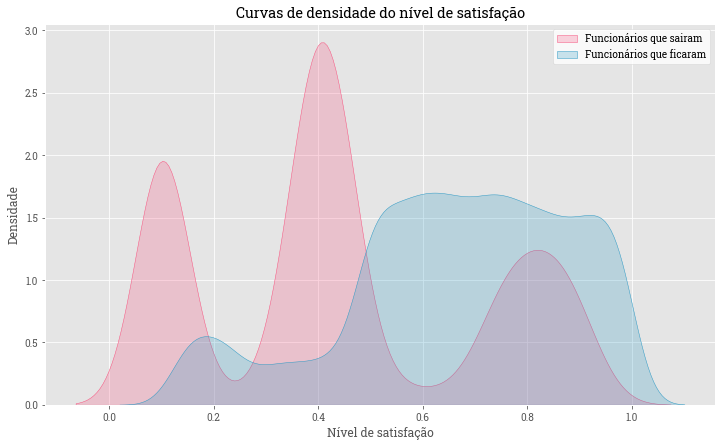

In [ ]:
# Estimativa de densidade
plt.figure(figsize=[12,7])
sns.kdeplot(x=left_df['satisfaction_level'],shade=True,color=graf_color[0],label = 'Funcionários que sairam')
sns.kdeplot(x=stayed_df['satisfaction_level'],shade=True,color=graf_color[1],label = 'Funcionários que ficaram')
plt.title('Curvas de densidade do nível de satisfação'),plt.ylabel('Densidade'),plt.xlabel('Nível de satisfação')
plt.legend(facecolor='white');

Nível de satisfação dos funcionários que saíram pode ser distribuído em três grupos;
*   Insatisfeitos (pico entre 10% e 20%)
*   Satisfação regular/mediana (pico ao redor de 40%)
*   Satisfeitos (pico ao redor de 80%)

Com relação aos funcionários que ficaram, é afirmável que o nível de satisfação é maior que 50% de forma consistente para maior parte dos indivíduos.



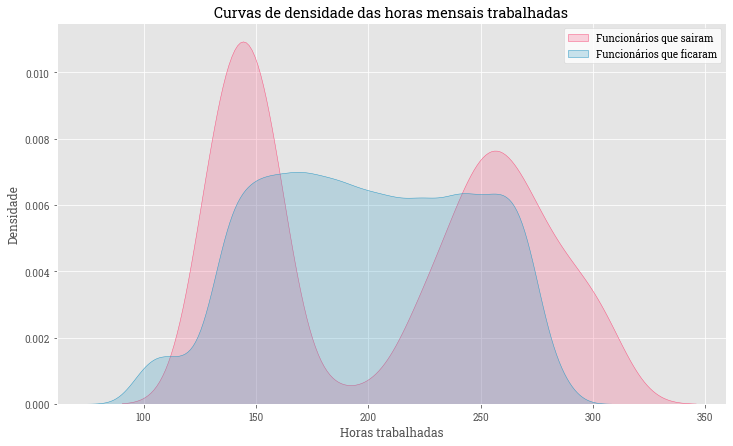

In [ ]:
# Estimativa de densidade
plt.figure(figsize=[12,7])
sns.kdeplot(x=left_df['average_montly_hours'],shade=True,color=graf_color[0],label = 'Funcionários que sairam')
sns.kdeplot(x=stayed_df['average_montly_hours'],shade=True,color=graf_color[1],label = 'Funcionários que ficaram')
plt.title('Curvas de densidade das horas mensais trabalhadas'),plt.ylabel('Densidade'),plt.xlabel('Horas trabalhadas')
plt.legend(facecolor='white');

As horas trabalhadas dos funcionários que saíram podem ser distribuídas em dois grupos;
*   Poucas horas trabalhadas (pico ao redor de 150 horas)
*   Muitas horas trabalhadas (pico ao redor de 260 horas)

Com relação aos funcionários que ficaram, é afirmável que as horas trabalhadas se distribuem de forma constante entre 140 e 270 horas.

## Pré-processamento e bases de treinamento/teste

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low



> **Criação de variáveis dummy e normalização de variáveis**



Criação de variáveis *dummy* (variáveis binárias) para representação das características categóricas (departamento e vendas) e normalização de todas as variáveis, para que não ocorram distorções de escala
entre os diferentes campos, visando uma melhor desempenho dos modelos.

In [ ]:
# Separando variáveis preditoras categóricas
X_cat = df[['Department','salary']]

# Objeto recebendo o método 'OneHotEncoder' para criação de dummies
onehot = OneHotEncoder(sparse=False, drop='first')

# Aplicação do 'OneHotEncoder'
X_cat = onehot.fit_transform(X_cat.values)
X_cat = pd.DataFrame(X_cat, columns=onehot.get_feature_names())

# Separando variáveis preditoras numéricas
X_num = df.drop(columns=['Department','salary','left'],axis=1)

# Criação de base unificada com variáveis numéricas e categóricas
all_X = pd.concat([X_num,X_cat],axis=1)

# Padronizando variáveis
scaler = MinMaxScaler()
X = scaler.fit_transform(all_X)

# Criação de variável target (dependente)
y = df['left']




> **Aplicação do algoritmo SMOTE + ENN**

Dado o desbalanceamento entre as classes (proporção muito maior de funcionários que ficaram na empresa), métodos de amostragem foram aplicados, visando diminuir a possibilidade de viés de classificação dos modelos que serão ajustados.



*   ***SMOTE (Oversampling)***

O algoritmo SMOTE *(Synthetic Minority Oversampling Technique)* consiste em sintetizar observações para a classe minoritária, com base nas que já existem. Funciona escolhendo aleatoriamente uma observação da classe minoritária e calculando os **k vizinhos mais próximos (K-NN)** para essa observação. Os registros sintéticos (cópias das observações da classe minoritária, porém com pequenas variações) são adicionados entre o registro escolhido e os seus vizinhos.

![alt text](https://github.com/GeorgeSantos1/GeorgeSantos1.github.io/raw/master/images/SMOTEE_IMG.png)

*   ***ENN (Undersampling)***

O método ENN funciona primeiramente encontrando os K-NN de cada observação, depois verifica se a classe maioritária dos K-NN da observação é a mesma que a classe da observação ou não. Se a classe maioritária dos K-NN da observação e a classe da observação diferirem, então a observação e seus K-NN são eliminados do conjunto de dados.

![alt text](https://github.com/GeorgeSantos1/GeorgeSantos1.github.io/raw/master/images/ENN_IMG.png)

*   ***SMOTE + ENN***

Este método combina a capacidade do algoritmo SMOTE de gerar observações sintéticas para a classe minoritária e a capacidade do algoritmo ENN de eliminar algumas observações de ambas as classes, sendo identificadas como tendo classe diferente entre a classe da observação e classe maioritária dos seus K-NN.

O algoritmo funciona da seguinte forma;

1.   (Início do SMOTE) Escolher observações aleatórios da classe minoritária.
2.   Calcular a distância entre as observações aleatórios e os seus K-NN.
3.   Multiplicar a diferença com um número aleatório entre 0 e 1, depois adicione o resultado à classe minoritária como uma amostra sintética.
4.   Repetir o passo número 2-3 até que a proporção desejada da classe minoritária seja atingida (Fim do SMOTE). 
5.   (Início do ENN) Determinar K, como o número de vizinhos mais próximos. Se não for determinado, então K=3.
6.   Encontrar os K-NN mais próximos de uma observação entre as outras observações no conjunto de dados, depois armazenar a classe maioritária dos K-NN.
7.   Se a classe da observação e a classe maioritária dos K-NN da observação diferirem, então a observação e seus K-NN são eliminados do conjunto de dados.
8.   Repetir os passos 6 e 7 até que a proporção desejada de cada classe seja alcançada (Fim do ENN). 









In [ ]:
# Criação do método SMOTEENN
sme = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'),random_state=42)

# Aplicação do algoritmo SMOTEENN
X_res, y_res = sme.fit_sample(X, y)

# Frequencia das categorias após aplicação do método
np.unique(y_res,return_counts=True)

(array([0, 1]), array([10394, 11146]))


> **Divisão de base em treinamento/teste**


Divisão da base entre treinamento e teste, onde a base de treinamento será utilizada no ajuste dos modelos e a base de teste na validação do modelo, através das previsões.

In [ ]:
# Divisão da base (75% para treino e 25% para teste)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,test_size = 0.25,random_state = 42)

print(f'Nº de observações na base de treinamento: {y_train.shape[0]}')
print(f'Nº de observações na base de teste: {y_test.shape[0]}')

Nº de observações na base de treinamento: 16155
Nº de observações na base de teste: 5385


## Modelos

Dado que o problema em questão é de classificação binária (prever *turnover* de funcionários), foram utilizados os modelos de:
1. **Regressão logística**
2. **Floresta aleatória (random forest)**
3. **Redes neurais artificiais (artificial neural network)**.

### Regressão Logística

Regressão logística é um método estatístico análogo à regressão linear, porém destinado a problemas de classificação (variável depende categórica). De forma geral, o método retorna a estimativa da probabilidade de ocorrência de um evento, dado um conjunto de variáveis explanatórias (independentes). 

Se a estimativa de probabilidade for maior ou igual à 0,5 a previsão é classe 1 (funcionário sai da empresa), caso contrário é classe 0 (funcionário fica na empresa).

In [ ]:
# Criação e ajuste do modelo de regressão logística
logistic = LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Previsão do modelo para dados de texte
y_pred = logistic.predict(X_test)

print(f'Acurácia do modelo: {accuracy_score(y_test,y_pred).round(2)*100}%')

Acurácia do modelo: 79.0%


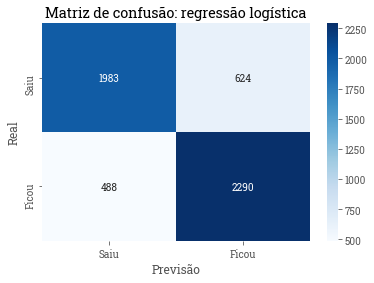

In [ ]:
# Matriz de Confusão
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='.0f',cmap="Blues",
            xticklabels=['Saiu','Ficou'],
            yticklabels=['Saiu','Ficou'])
plt.title('Matriz de confusão: regressão logística')
plt.xlabel('Previsão'),plt.ylabel('Real');

In [ ]:
# Outras Métricas de avaliação
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78      2607
           1       0.79      0.82      0.80      2778

    accuracy                           0.79      5385
   macro avg       0.79      0.79      0.79      5385
weighted avg       0.79      0.79      0.79      5385



O modelo apresentou valores próximos da acurácia para as métricas de precisão, revocação e f1-score, em cada uma das categorias, indicando que o modelo não tem viés de classificação.



> **Importância de características**



In [ ]:
# Armazenando coeficientes estimados
coef = logistic.coef_[0]

# Criação de 'feature_importance' com variáveis preditoras
feature_importance = pd.DataFrame(all_X.columns,columns=['feature'])

# inserção de coeficientes na base 'feature_importance' e classificação de variáveis
feature_importance['importance'] = coef
feature_importance['importance_for'] = list(map(lambda x: 'Importante para sair' if x > 0 else 'Importante para ficar',
                                                feature_importance['importance']))
# Ordenando 'feature_importance'
feature_importance = feature_importance.sort_values(by=['importance'],ascending=False)


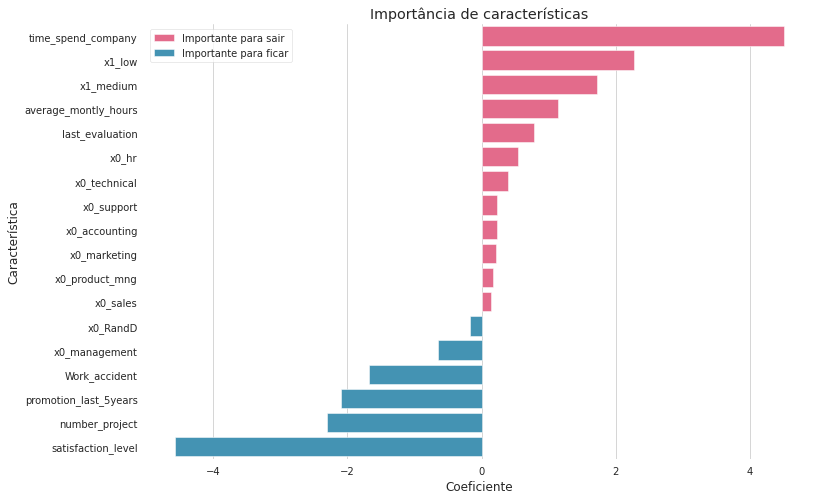

In [ ]:
plt.figure(figsize=[12,8])
sns.set_style("whitegrid",)
sns.barplot(y='feature',x='importance',data=feature_importance,
            hue='importance_for',dodge=False,palette=['#f75782','#329bc5'])
sns.despine(left=True,bottom=True)
plt.title('Importância de características'), plt.ylabel('Característica'), plt.xlabel('Coeficiente')
plt.legend();

Tempo gasto para chegar na empresa e salário (baixo e médio) foram importantes na previsão de quais funcionários deixaram a empresa. Nível de satisfação, número de projetos e promoção nos últimos 5 anos foram importantes na previsão de quais funcionários ficaram na empresa.

### Redes Neurais Artificiais

Redes neurais artificiais são modelos computacionais inspirados na estrutura neural de organismos inteligentes que são capazes de realizar o aprendizado de máquina bem como o reconhecimento de padrões. 

Basicamente, o neurônio possui um corpo celular, os dendritos e o axônio. Os neurônios se comunicam uns com os outros através de impulsos elétricos (sinapses). Para isso, contam com um conjunto de terminais capazes de receber e enviar sinais. Os terminais de entrada são chamados dendritos, enquanto o de saída é chamado de axônio. 

![alt test](https://github.com/GeorgeSantos1/GeorgeSantos1.github.io/raw/master/images/NEURONIO_IMG.png)

A relação entre as redes artificiais e biológica é que ambas possuem axônio e dendrito e comunicam-se por sinapses. A representação dessa relação é exibida na imagem abaixo, onde a letra x representa os sinais recebidos e a força sináptica recebida é simbolizada por w. Ambas as redes possuem a capacidade de ajustar a amplitude das sinapses em uma série de camadas interligadas. O modelo artificial apresentado na imagem abaixo representa a mais simples rede neural artificial, chamada de perceptron.

![alt test](https://github.com/GeorgeSantos1/GeorgeSantos1.github.io/raw/master/images/REL_NEURONIO_IMG.png)

De uma maneira geral, o algoritmo de redes neurais artificiais funciona como o neurônio biológico, ou seja, há o recebimento de um estímulo, o processamento de uma função e o retorno de um determinado valor. Existem várias formas de se desenvolver uma rede neural. Ela deve ser montada conforme o(s) problema(s) a ser(em) resolvido(s). Em sua arquitetura são determinados o número de camadas usadas (as camadas são formadas por neurônios), a quantidade de neurônios em cada camada, função de ativação utilizada, etc.

In [ ]:
# Montagem do modelo no objeto 'redes_neurais'
redes_neurais = tf.keras.models.Sequential()

# Adicionando camada de entrada (18 variáveis) e primeira camada oculta (10 neurônios,F_Ativ = ReLu)
redes_neurais.add(tf.keras.layers.Dense(units = 10,activation='relu',input_shape=(18,)))

# Adicionando camada segunda camanda oculta (10 neurônios,F_Ativ =  ReLu)
redes_neurais.add(tf.keras.layers.Dense(units = 10,activation='relu'))

# Adicionando camada de saída (1 saida, F_Ativ = Sigmoid)
redes_neurais.add(tf.keras.layers.Dense(units = 1,activation='sigmoid'))

# informações sobre a rede montada
redes_neurais.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                190       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 311
Trainable params: 311
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# definindo parâmetros do método de otimização selecionado
alg = tf.keras.optimizers.Adam(learning_rate = 0.1)

# Compilando a rede neural
redes_neurais.compile(optimizer=alg,loss='binary_crossentropy',metrics = ['accuracy'])

# Definindo parâmetros de parada
parade = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 25)

# Ajuste do modelo de redes neurais aos dados de treinamento
redes_neurais.fit(X_train,y_train,epochs=200,callbacks=parade)

Epoch 1/200
505/505 [==============================] - 2s 2ms/step - loss: 0.3886 - accuracy: 0.8352
Epoch 2/200
505/505 [==============================] - 1s 2ms/step - loss: 0.2309 - accuracy: 0.9201
Epoch 3/200
505/505 [==============================] - 1s 2ms/step - loss: 0.1490 - accuracy: 0.9521
Epoch 4/200
505/505 [==============================] - 1s 1ms/step - loss: 0.1547 - accuracy: 0.9501
Epoch 5/200
505/505 [==============================] - 1s 2ms/step - loss: 0.1413 - accuracy: 0.9549
Epoch 6/200
505/505 [==============================] - 1s 2ms/step - loss: 0.1471 - accuracy: 0.9538
Epoch 7/200
505/505 [==============================] - 1s 2ms/step - loss: 0.1369 - accuracy: 0.9574
Epoch 8/200
505/505 [==============================] - 1s 2ms/step - loss: 0.1372 - accuracy: 0.9554
Epoch 9/200
505/505 [==============================] - 1s 1ms/step - loss: 0.1333 - accuracy: 0.9569
Epoch 10/200
505/505 [==============================] - 1s 2ms/step - loss: 0.1306 - accura

In [ ]:
# cálculo probabilidades para dados de teste considerando modelo treinado
y_pred = redes_neurais.predict(X_test)

# Classificando os indivíduos com base nas probabilidades obtidas
y_pred = (y_pred > 0.5)

print(f'Acurácia do modelo: {accuracy_score(y_test,y_pred).round(3)*100}%')

Acurácia do modelo: 96.2%


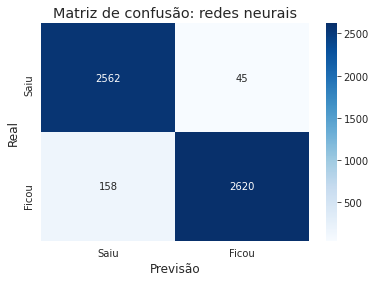

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='.0f',cmap="Blues",
            xticklabels=['Saiu','Ficou'],
            yticklabels=['Saiu','Ficou'])
plt.title('Matriz de confusão: redes neurais')
plt.xlabel('Previsão'),plt.ylabel('Real');

In [ ]:
# Outras Métricas de avaliação
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2607
           1       0.98      0.94      0.96      2778

    accuracy                           0.96      5385
   macro avg       0.96      0.96      0.96      5385
weighted avg       0.96      0.96      0.96      5385



O modelo apresentou valores excelentes para as métricas de precisão, revocação e f1-score, em cada uma das categorias, indicando que o modelo não tem viés de classificação.

### Floresta Aleatória

Florestas aleatórias é um método de aprendizagem *ensemble* (combinação de diferentes modelos para se obter um único resultado) para classificação, regressão e outras tarefas, que operam construindo uma infinidade de árvores de decisão aleatórias no momento do treinamento, gerando a classe (tomando aquela com a maioria dos votos como a previsão selecionada) ou previsão média (média das árvores individuais).

As Árvores de Decisão, ou *Decision Trees*, estabelecem regras para tomada de decisão. O algoritmo criará uma estrutura similar a um fluxograma, com "nós" onde uma condição é verificada, e se atendida o fluxo segue por um ramo, caso contrário, por outro, sempre levando ao próximo nó, até a finalização da árvore.

![](https://github.com/GeorgeSantos1/GeorgeSantos1.github.io/raw/master/images/RANDOM_FOREST.png)

In [ ]:
# Criação e ajuste do modelo de floresta aleatórias
forest = RandomForestClassifier()
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Previsão do modelo para dados de texte
y_pred = forest.predict(X_test)

print(f'Acurácia do modelo: {accuracy_score(y_test,y_pred).round(3)*100}%')

Acurácia do modelo: 99.7%


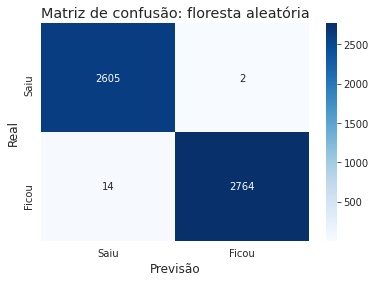

In [ ]:
# Matriz de Confusão
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='.0f',cmap='Blues',
            xticklabels=['Saiu','Ficou'],
            yticklabels=['Saiu','Ficou'])
plt.title('Matriz de confusão: floresta aleatória')
plt.xlabel('Previsão'),plt.ylabel('Real');

In [ ]:
# Outras Métricas de avaliação
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2607
           1       1.00      0.99      1.00      2778

    accuracy                           1.00      5385
   macro avg       1.00      1.00      1.00      5385
weighted avg       1.00      1.00      1.00      5385



O modelo apresentou valores excelentes para as métricas de precisão, revocação e f1-score, em cada uma das categorias, indicando que o modelo não tem viés de classificação.

> **Importância de características**

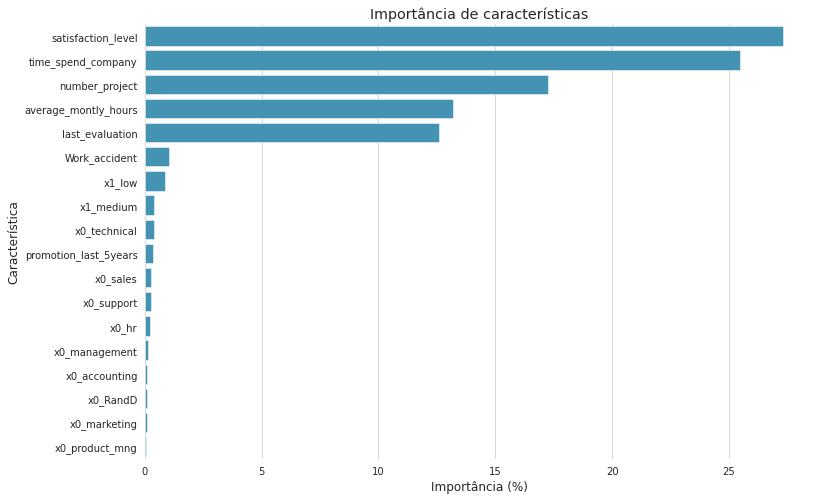

In [ ]:
# Criação de 'feature_importance' com variáveis preditoras
feature_importance = pd.DataFrame(all_X.columns,columns=['feature'])

# inserção de '% de importância' na base 'feature_importance'
feature_importance['importance'] = forest.feature_importances_*100

# Ordenando 'feature_importance'
feature_importance = feature_importance.sort_values(by=['importance'],ascending=False)

# Criação de visualização gráfica
plt.figure(figsize=[12,8])
sns.set_style("whitegrid")
sns.barplot(y='feature',x='importance',data=feature_importance,
            color = '#329bc5')
sns.despine(left=True,bottom=True)
plt.title('Importância de características'), plt.ylabel('Característica'), plt.xlabel('Importância (%)');

Nível de satisfação, tempo de deslocamento, número de projetos e carga horária mensal foram as características mais importantes para classificação do modelo.

## Conclusão

* Pode-se prever com uma taxa de 99% de acerto (random forest) se o funcionário é propenso a sair da empresa (*turnover* voluntário).
* Métodos utilizados para tratamento de classes desbalanceadas foram eficazes, os modelos não apresentaram viés de classificação (não apresentaram tendência à falsos negativos, ou seja, prever que o funcionário fica quando na realidade ele sai).
* Tempo de deslocamento, nível de satisfação, número de projetos e horas mensais trabalhadas são características importantes para previsão de *turnover* voluntário.
* Flexibilização do horário de trabalho, parcerias com instituições que favoreçam a qualidade de vida (academia, teatro, livrarias), promoção de confraternizações, oferecer um local de trabalho confortável com boas condições para executar as atividades e plano de carreira sólido são algumas ações que podem ser executadas para evitar a saída do funcionário da empresa.

## Links Úteis


1.   [https://blog.deskmanager.com.br/diminuir-turnover/](https://blog.deskmanager.com.br/diminuir-turnover/)
2.   [https://towardsdatascience.com/imbalanced-classification-in-python-smote-enn-method-db5db06b8d50](https://towardsdatascience.com/imbalanced-classification-in-python-smote-enn-method-db5db06b8d50)
3.   [https://machinelearningmastery.com/data-sampling-methods-for-imbalanced-classification/](https://machinelearningmastery.com/data-sampling-methods-for-imbalanced-classification/)
4.   [https://www.rhportal.com.br/artigos-rh/funcionrios-felizes-na-reduo-de-custos/](https://www.rhportal.com.br/artigos-rh/funcionrios-felizes-na-reduo-de-custos/)
5.   [https://www.ime.unicamp.br/~mac/db/2020-1S-177439.pdf](https://www.ime.unicamp.br/~mac/db/2020-1S-177439.pdf)
6.   [http://repositorio.unicamp.br/jspui/bitstream/REPOSIP/344425/1/Santana_FelipeBachionDe_D.pdf](http://repositorio.unicamp.br/jspui/bitstream/REPOSIP/344425/1/Santana_FelipeBachionDe_D.pdf)

